<!-- @import "[TOC]" {cmd="toc" depthFrom=1 depthTo=6 orderedList=false} -->

![Riding the efficient frontier MidJourney 11.2023](https://raw.githubusercontent.com/adamd1985/quant_research/main/images/frontier_banner.png)

The Efficient Frontier, a core concept in Harry Markowitz's Modern Portfolio Theory (MPT), is used in quantitative finance to build optimal portfolios that offer the highest expected return for a given level of risk.

It is constructed by diversifying assets to find the best risk-return trade-off, which we will do in this article, through python and free financial data. The resulting universe of assets and portfolios should lie on the **efficient frontier**.

## Prepare your Environment

Have a jupyter environment ready, and `pip install` these libraries:
- numpy
- pandas
- yfinance

You'll need access to [analysis_utils](./analysis_utils.py) library for common functions.

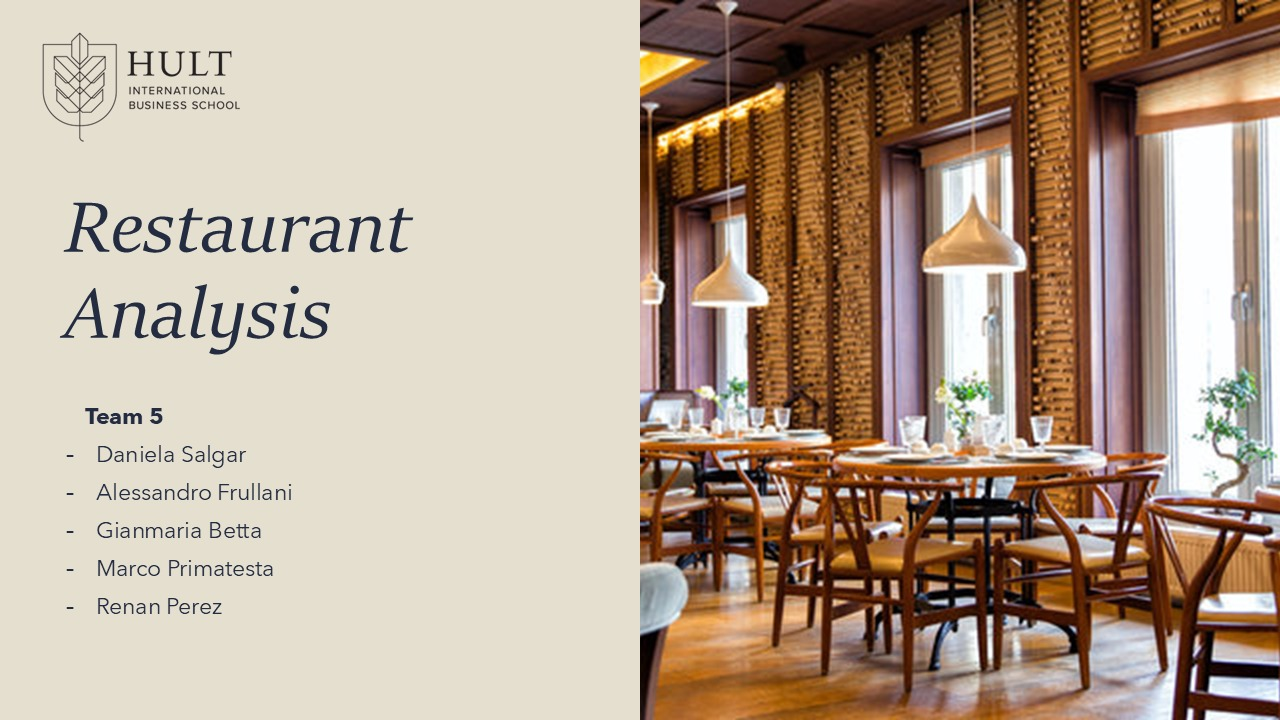

# **Install & Import Packages**

In [82]:
!pip install -q gdown
import gdown # Google Drive Connector
import pandas as pd # DataFrame
from typing import Tuple, List, Dict

# **Download & Import Datasets**

In [83]:
import gdown
import pandas as pd
import os

# Define the directory URL
directory_url = 'https://drive.google.com/drive/folders/1GtIfSS0K3wyBkOPD0jOy7V8fIXW3JEfj'

# Try to download files first, if fails, use local path
try:
    # Attempt to download all files within the directory
    gdown.download_folder(url=directory_url, quiet=False, use_cookies=False)
    base_path = '/content/Student Data/Copy of'
except Exception as e:
    print(f"Failed to download files: {e}")
    print("Using local path instead...")
    base_path = '/content'

# Dictionary of file paths and their corresponding dataframe names
files = {
    'items.pickle': 'df_items',
    'restaurants.pickle': 'df_restaurants',
    'orders.pickle': 'df_orders',
    'orders_7.pickle': 'df_orders_7',
    'students.pickle': 'df_students',
    'summarized_orders.pickle': 'df_summarized_orders'
}

# Load pickle files
for file, df_name in files.items():
    try:
        if base_path == '/content/Student Data/Copy of':
            globals()[df_name] = pd.read_pickle(f'{base_path} {file}')
        else:
            globals()[df_name] = pd.read_pickle(f'{base_path}/{file}')
    except Exception as e:
        print(f"Error loading {file}: {e}")

# Load Excel file separately since it has different extension
try:
    if base_path == '/content/Student Data/Copy of':
        df_university = pd.read_excel(f'{base_path} university.xlsx')
    else:
        df_university = pd.read_excel(f'{base_path}/university.xlsx')
except Exception as e:
    print(f"Error loading university.xlsx: {e}")

Retrieving folder contents


Processing file 1q0l9opeh5hobEMv8eh24EmdZqq02WvVN Copy of items.pickle
Processing file 1KjVaa5IMkLmcvMjrXMSg_JqSlrPkMBQZ Copy of orders_7.pickle
Processing file 1cUp2b1C-10UnqVgMXf4WiiD8Qz1u6Plc Copy of orders.pickle
Processing file 1FK6K6lSHclQIGHWjPOj1snGNMGkdUa0y Copy of restaurants.pickle
Processing file 1w0F1pk7c713iaXssleLg3vQopAT2m1Yk Copy of students.pickle
Processing file 1yE1UizU7kn-O2ZEdULl5lM3BB1vBLaQO Copy of summarized_orders.pickle
Processing file 1EMZkF4_TPp-O5L8lcjLx_8_96L44kCCE Copy of university.xlsx


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1q0l9opeh5hobEMv8eh24EmdZqq02WvVN
To: /content/Student Data/Copy of items.pickle
100%|██████████| 1.75k/1.75k [00:00<00:00, 4.51MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1KjVaa5IMkLmcvMjrXMSg_JqSlrPkMBQZ
From (redirected): https://drive.google.com/uc?id=1KjVaa5IMkLmcvMjrXMSg_JqSlrPkMBQZ&confirm=t&uuid=85566796-a623-417a-8a42-75e4c51ec20d
To: /content/Student Data/Copy of orders_7.pickle
100%|██████████| 236M/236M [00:01<00:00, 135MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1cUp2b1C-10UnqVgMXf4WiiD8Qz1u6Plc
From (redirected): https://drive.google.com/uc?id=1cUp2b1C-10UnqVgMXf4WiiD8Qz1u6Plc&confirm=t&uuid=0e980af4-703c-4a2f-8847-fb37d1283737
To: /content/Student Data/Copy of orders.pickle
100%|██████████| 156M/156M [00:01<00:00, 91.7MB/s]
Downloading...
From: https://drive.google.co

# **Data Cleaning**

## 1: Profile Initial Data

In [84]:
def profile_table(table_name: str, df: pd.DataFrame) -> Tuple[str, int, int, int, int, List[str], Dict[str, float], List[str]]:
    print(f"\n{'='*80}\nStarting to process table: {table_name}\n{'='*80}")

    # Calculate metrics and gather information
    total_rows = df.shape[0]
    total_columns = df.shape[1]
    null_rows = df.isnull().any(axis=1).sum()
    duplicate_rows = df.duplicated().sum()

    # Return the gathered information as a tuple
    return table_name, total_rows, total_columns, null_rows, duplicate_rows


# List of your DataFrames
dataframes = [df_items, df_restaurants, df_orders, df_orders_7, df_students, df_summarized_orders, df_university]
dataframe_names = ['df_items', 'df_restaurants', 'df_orders', 'df_orders_7', 'df_students', 'df_summarized_orders', 'df_university']

# Create an empty list to store the results
results = []

# Loop through all tables and profile them
for i, df in enumerate(dataframes):
    result = profile_table(dataframe_names[i], df)
    results.append(result)
    print(f"Completed processing table: {dataframe_names[i]}")
    print("---\n")

# Create a DataFrame from the results
result_df = pd.DataFrame({
    "table_name": [r[0] for r in results],
    "total_rows": [r[1] for r in results],
    "total_columns": [r[2] for r in results],
    "null_rows": [r[3] for r in results],
    "duplicate_rows": [r[4] for r in results]
})

# Display the results
display(result_df)


Starting to process table: df_items
Completed processing table: df_items
---


Starting to process table: df_restaurants
Completed processing table: df_restaurants
---


Starting to process table: df_orders
Completed processing table: df_orders
---


Starting to process table: df_orders_7
Completed processing table: df_orders_7
---


Starting to process table: df_students
Completed processing table: df_students
---


Starting to process table: df_summarized_orders
Completed processing table: df_summarized_orders
---


Starting to process table: df_university
Completed processing table: df_university
---



,table_name,total_rows,total_columns,null_rows,duplicate_rows
0,df_items,31,3,0,0
1,df_restaurants,8,7,0,0
2,df_orders,2387224,10,111585,0
3,df_orders_7,2387224,15,111585,0
4,df_students,9,7,5,0
5,df_summarized_orders,2806,4,0,0
6,df_university,4,4,0,0


## 2: Drop Null Rows

In [85]:
def clean_dataframes(result_df: pd.DataFrame, dataframe_names: List[str], dataframes: List[pd.DataFrame]) -> None:
    """
    Cleans the dataframes by dropping null rows and null columns based on the profiling results.

    Parameters:
        result_df (pd.DataFrame): The DataFrame containing profiling results.
        dataframe_names (List[str]): List of names corresponding to the DataFrames.
        dataframes (List[pd.DataFrame]): List of DataFrames to be cleaned.
    """
    for i in range(len(dataframes)):
        df_name = dataframe_names[i]
        df = dataframes[i]
        # Get the corresponding row from result_df (same order)
        row = result_df.iloc[i]

        # Drop rows with any null values if there were null rows
        if row['null_rows'] > 0:
            df.dropna(axis=0, how='any', inplace=True)

# Usage after profiling
clean_dataframes(result_df, dataframe_names, dataframes)

# Optionally, reprofile to verify cleaning
results_after_cleaning = []
for i, df in enumerate(dataframes):
    result = profile_table(dataframe_names[i], df)
    results_after_cleaning.append(result)

result_after_clean_df = pd.DataFrame({
    "table_name": [r[0] for r in results_after_cleaning],
    "total_rows": [r[1] for r in results_after_cleaning],
    "total_columns": [r[2] for r in results_after_cleaning],
    "null_rows": [r[3] for r in results_after_cleaning],
    "duplicate_rows": [r[4] for r in results_after_cleaning]
})

display(result_after_clean_df)


Starting to process table: df_items

Starting to process table: df_restaurants

Starting to process table: df_orders

Starting to process table: df_orders_7

Starting to process table: df_students

Starting to process table: df_summarized_orders

Starting to process table: df_university


,table_name,total_rows,total_columns,null_rows,duplicate_rows
0,df_items,31,3,0,0
1,df_restaurants,8,7,0,0
2,df_orders,2275639,10,0,0
3,df_orders_7,2275639,15,0,0
4,df_students,4,7,0,0
5,df_summarized_orders,2806,4,0,0
6,df_university,4,4,0,0


## 3: Inspect Data Types

In [86]:
def get_dataframe_info(dataframes, dataframe_names):
  """
  Gets column names and data types for multiple dataframes.

  Args:
      dataframes: A list of pandas DataFrames.
      dataframe_names: A list of strings, where each string is the name of the corresponding DataFrame.

  Returns:
      A pandas DataFrame containing the dataframe name, column name, and data type.
  """

  all_info = []
  for df, name in zip(dataframes, dataframe_names):
    if isinstance(df, pd.DataFrame):  # Check if it's actually a DataFrame
      for col in df.columns:
        all_info.append([name, col, df[col].dtype])
    else:
      print(f"Warning: {name} is not a DataFrame. Skipping...")

  return pd.DataFrame(all_info, columns=["dataframe", "column_name", "type"])

# Example usage (replace with your actual dataframes and names)
dataframes = [df_items, df_restaurants, df_orders, df_orders_7, df_students, df_summarized_orders, df_university]
dataframe_names = ['df_items', 'df_restaurants', 'df_orders', 'df_orders_7', 'df_students', 'df_summarized_orders', 'df_university']

dataframe_info = get_dataframe_info(dataframes, dataframe_names)
display(dataframe_info)

,dataframe,column_name,type
0,df_items,ITEM_ID,object
1,df_items,ITEM_NAME,object
2,df_items,ITEM_TYPE,object
3,df_restaurants,RESTAURANT_ID,object
4,df_restaurants,NAME,object
5,df_restaurants,ADDRESS,object
6,df_restaurants,LAT,float64
7,df_restaurants,LONG,float64
8,df_restaurants,OPENING_DATE,object
9,df_restaurants,DELIVERY_START,object


## 4: Cast Data Types

In [87]:
# Convert 'OPENING_DATE' and 'DELIVERY_START' columns to datetime objects
for df_name in ['df_restaurants']:
    try:
        df = globals()[df_name]
        for col in ['OPENING_DATE', 'DELIVERY_START']:
            if col in df.columns:
                df[col] = pd.to_datetime(df[col], errors='coerce')  # Use errors='coerce' to handle invalid dates
    except KeyError:
        print(f"DataFrame '{df_name}' or column not found.")
    except Exception as e:
        print(f"An error occurred while converting '{df_name}' column: {e}")

dataframe_info = get_dataframe_info(dataframes, dataframe_names)
display(dataframe_info)

,dataframe,column_name,type
0,df_items,ITEM_ID,object
1,df_items,ITEM_NAME,object
2,df_items,ITEM_TYPE,object
3,df_restaurants,RESTAURANT_ID,object
4,df_restaurants,NAME,object
5,df_restaurants,ADDRESS,object
6,df_restaurants,LAT,float64
7,df_restaurants,LONG,float64
8,df_restaurants,OPENING_DATE,datetime64[ns]
9,df_restaurants,DELIVERY_START,datetime64[ns]


## 5: Normalize Orders

In [88]:
# prompt: please normalize the "MAIN", "BASE", "SIDE_1", "SIDE_2" columns into a ITEM_ID from the df_orders

# Assuming 'df_orders' is your DataFrame
def normalize_item_column(df):
    """Normalizes 'MAIN', 'BASE', 'SIDE_1', and 'SIDE_2' into an 'ITEM_ID'."""

    # Melt the DataFrame to combine the columns into a single column
    df_melted = pd.melt(df,
                        id_vars=df.columns.difference(['MAIN', 'BASE', 'SIDE_1', 'SIDE_2']), # Keep all columns except the ones to combine
                        value_vars=['MAIN', 'BASE', 'SIDE_1', 'SIDE_2'],
                        var_name='ITEM_CATEGORY',
                        value_name='ITEM_ID')

    # Remove rows where 'ITEM_ID' is NaN
    df_melted = df_melted.dropna(subset=['ITEM_ID'])

    return df_melted

df_orders = normalize_item_column(df_orders)
df_orders.head()

,COOKIES,DATETIME,DRINKS,ORDER_ID,RESTAURANT_ID,TYPE,ITEM_CATEGORY,ITEM_ID
0,2.0,2018-04-21 18:12:57,0.0,O752854,R10001,DELIVERY,MAIN,I0
1,0.0,2018-11-17 12:50:52,1.0,O2076864,R10005,PICKUP,MAIN,I0
2,0.0,2018-11-04 18:37:24,0.0,O1988898,R10008,IN_STORE,MAIN,I1
3,0.0,2018-10-19 19:55:09,0.0,O1878199,R10008,PICKUP,MAIN,I3
4,0.0,2018-04-17 12:06:05,0.0,O720465,R10003,PICKUP,MAIN,I0


# **Data Analysis**

## Orders

### Daily Total

In [89]:
order_trends = df_summarized_orders.groupby('DATE').agg(
    {'NUM_ORDERS': 'sum', 'PERC_DELIVERY': 'mean'}
)
order_trends

,NUM_ORDERS,PERC_DELIVERY
DATE,,
2018-01-01,4428,0.141935
2018-01-02,6508,0.129560
2018-01-03,6691,0.127067
2018-01-04,6616,0.135730
2018-01-05,6144,0.163175
...,...,...
2018-12-27,7594,0.117855
2018-12-28,7649,0.156912
2018-12-29,5560,0.121660


### Daily Total (Drinks & Cookies)

In [90]:
# Convert DATETIME to DATE
merged_df['DATE'] = pd.to_datetime(df_orders['DATETIME']).dt.date

order_type_drinks = (merged_df.
                     groupby(['DATE', 'TYPE'])[['DRINKS', 'COOKIES']]
                     .sum()
                     .sort_values(by=['DRINKS', 'COOKIES'], ascending=False)
                     .reset_index())
order_type_drinks

,DATE,TYPE,DRINKS,COOKIES
0,2018-09-05,IN_STORE,2480.0,4148.0
1,2018-06-19,IN_STORE,2444.0,4084.0
2,2018-07-24,IN_STORE,2436.0,4072.0
3,2018-09-06,IN_STORE,2420.0,4276.0
4,2018-05-24,IN_STORE,2408.0,4368.0
...,...,...,...,...
1090,2018-03-25,DELIVERY,108.0,584.0
1091,2018-01-15,DELIVERY,108.0,556.0
1092,2018-01-27,DELIVERY,108.0,540.0
1093,2018-04-20,DELIVERY,96.0,528.0


### Daily Total (By Restaurant)

In [91]:
top_restaurants = df_summarized_orders.sort_values(
    by=['DATE', 'NUM_ORDERS'], ascending=[True, False]
).reset_index(drop=True)
top_restaurants

,RESTAURANT_NAME,DATE,NUM_ORDERS,PERC_DELIVERY
0,NYU,2018-01-01,976,0.187500
1,Williamsburg,2018-01-01,854,0.161593
2,Upper West Side,2018-01-01,764,0.337696
3,Columbia,2018-01-01,519,0.157996
4,Flatiron,2018-01-01,484,0.148760
...,...,...,...,...
2801,Bryant Park,2018-12-31,969,0.133127
2802,Williamsburg,2018-12-31,957,0.114943
2803,Upper East Side,2018-12-31,879,0.201365
2804,Upper West Side,2018-12-31,844,0.214455


### Daily Average (by Restaurant)

In [92]:
average_orders = df_summarized_orders.groupby('RESTAURANT_NAME')[['NUM_ORDERS', 'PERC_DELIVERY']].mean().reset_index().sort_values(by=['NUM_ORDERS', 'PERC_DELIVERY'], ascending=False)
average_orders

,RESTAURANT_NAME,NUM_ORDERS,PERC_DELIVERY
4,NYU,1180.438356,0.101075
3,Midtown,891.136986,0.067296
0,Bryant Park,871.436782,0.068180
7,Williamsburg,862.120548,0.101493
5,Upper East Side,774.650704,0.190314
2,Flatiron,772.556164,0.101907
6,Upper West Side,770.372603,0.190129
1,Columbia,687.150685,0.101393


## Items

### Daily Total

In [93]:
# Merge df_orders with df_restaurants to get restaurant names
merged_df = pd.merge(df_orders, df_restaurants[['RESTAURANT_ID', 'NAME']], on='RESTAURANT_ID', how='left')

# Merge the result with df_items to get item names
merged_df = pd.merge(merged_df, df_items[['ITEM_ID', 'ITEM_NAME']], on='ITEM_ID', how='left')

# Rename the 'NAME' column to 'RESTAURANT_NAME'
merged_df = merged_df.rename(columns={'NAME': 'RESTAURANT_NAME'})

# Convert DATETIME to DATE
merged_df['DATE'] = pd.to_datetime(merged_df['DATETIME']).dt.date

# First, count items per restaurant per day
item_count = (merged_df.groupby(['DATE', 'ITEM_NAME'])['ITEM_ID']
             .count()
             .reset_index()
             .rename(columns={'ITEM_ID': 'COUNT'}))

item_count

,DATE,ITEM_NAME,COUNT
0,2018-01-01,Blistered Shishitos,696
1,2018-01-01,Cashew Kale Caesar,740
2,2018-01-01,Cauliflower with Garlic and Parmesan,1166
3,2018-01-01,Charred Broccoli with Lemon,914
4,2018-01-01,Charred Chicken Marketbowl,1281
...,...,...,...
5835,2018-12-31,Jasper Hill Mac & Cheese,1189
5836,2018-12-31,Roasted Sweet Potatoes,3141
5837,2018-12-31,Roasted Wild Alaskan Salmon Marketbowl,349
5838,2018-12-31,Snap Peas,3207


### Daily Total (By Restaurant)

In [94]:
# Merge df_orders with df_restaurants to get restaurant names
merged_df = pd.merge(df_orders, df_restaurants[['RESTAURANT_ID', 'NAME']], on='RESTAURANT_ID', how='left')

# Merge the result with df_items to get item names
merged_df = pd.merge(merged_df, df_items[['ITEM_ID', 'ITEM_NAME']], on='ITEM_ID', how='left')

# Rename the 'NAME' column to 'RESTAURANT_NAME'
merged_df = merged_df.rename(columns={'NAME': 'RESTAURANT_NAME'})

# Convert DATETIME to DATE
merged_df['DATE'] = pd.to_datetime(merged_df['DATETIME']).dt.date

# First, count items per restaurant per day
item_count = (merged_df.groupby(['DATE', 'RESTAURANT_NAME', 'ITEM_NAME'])['ITEM_ID']
             .count()
             .reset_index()
             .rename(columns={'ITEM_ID': 'COUNT'}))

item_count

,DATE,RESTAURANT_NAME,ITEM_NAME,COUNT
0,2018-01-01,Bryant Park,Blistered Shishitos,49
1,2018-01-01,Bryant Park,Cashew Kale Caesar,74
2,2018-01-01,Bryant Park,Cauliflower with Garlic and Parmesan,87
3,2018-01-01,Bryant Park,Charred Broccoli with Lemon,71
4,2018-01-01,Bryant Park,Charred Chicken Marketbowl,110
...,...,...,...,...
44886,2018-12-31,Williamsburg,Jasper Hill Mac & Cheese,139
44887,2018-12-31,Williamsburg,Roasted Sweet Potatoes,394
44888,2018-12-31,Williamsburg,Roasted Wild Alaskan Salmon Marketbowl,46
44889,2018-12-31,Williamsburg,Snap Peas,394


### Daily Average (by Restaurant)

In [95]:
# Merge df_orders with df_restaurants to get restaurant names
merged_df = pd.merge(df_orders, df_restaurants[['RESTAURANT_ID', 'NAME']], on='RESTAURANT_ID', how='left')

# Merge the result with df_items to get item names
merged_df = pd.merge(merged_df, df_items[['ITEM_ID', 'ITEM_NAME']], on='ITEM_ID', how='left')

# Rename the 'NAME' column to 'RESTAURANT_NAME'
merged_df = merged_df.rename(columns={'NAME': 'RESTAURANT_NAME'})

# Convert DATETIME to DATE
merged_df['DATE'] = pd.to_datetime(merged_df['DATETIME']).dt.date

# First, count items per restaurant per day
item_count = (merged_df.groupby(['DATE', 'RESTAURANT_NAME', 'ITEM_NAME'])['ITEM_ID']
             .count()
             .reset_index()
             .rename(columns={'ITEM_ID': 'COUNT'}))

# Then calculate the daily average across all restaurants
average_items = (item_count.groupby(['RESTAURANT_NAME', 'ITEM_NAME'])['COUNT']
                .mean()
                .reset_index()
                .sort_values(['RESTAURANT_NAME', 'COUNT'], ascending=[True, False]))

# Rename the COUNT column to DAILY_AVG
average_items = average_items.rename(columns={'COUNT': 'DAILY_AVG'})

average_items

,RESTAURANT_NAME,ITEM_NAME,DAILY_AVG
12,Bryant Park,Roasted Sweet Potatoes,362.547893
14,Bryant Park,Snap Peas,357.168582
6,Bryant Park,Farm Greens with Mint,334.145594
7,Bryant Park,Farro with Summer Vegetables,310.114943
4,Bryant Park,Charred Chicken Marketbowl,252.716475
...,...,...,...
123,Williamsburg,Jasper Hill Mac & Cheese,145.564384
112,Williamsburg,Blistered Shishitos,127.506849
120,Williamsburg,Green Goddess Beans with Sesame,111.345205
121,Williamsburg,Grilled Organic Tofu Marketbowl,66.400000


## Delivery Type

### Daily Total

In [96]:
# Convert DATETIME to DATE
df_orders['DATE'] = pd.to_datetime(df_orders['DATETIME']).dt.date

delivery_count = df_orders.groupby(['DATE', 'TYPE'])['TYPE'].count().reset_index(name='COUNT')
delivery_count

,DATE,TYPE,COUNT
0,2018-01-01,DELIVERY,2860
1,2018-01-01,IN_STORE,11528
2,2018-01-01,PICKUP,2600
3,2018-01-02,DELIVERY,3164
4,2018-01-02,IN_STORE,17856
...,...,...,...
1090,2018-12-30,IN_STORE,14460
1091,2018-12-30,PICKUP,3208
1092,2018-12-31,DELIVERY,4048
1093,2018-12-31,IN_STORE,19944


### Daily Total (Drinks & Cookies)

In [97]:
# Convert DATETIME to DATE
merged_df['DATE'] = pd.to_datetime(df_orders['DATETIME']).dt.date

order_type_drinks = (merged_df.
                     groupby(['DATE'])[['DRINKS', 'COOKIES']]
                     .sum()
                     .sort_values(by=['DATE'], ascending=True)
                     .reset_index())
order_type_drinks

,DATE,DRINKS,COOKIES
0,2018-01-01,1076.0,4144.0
1,2018-01-02,2040.0,6244.0
2,2018-01-03,1672.0,6592.0
3,2018-01-04,1824.0,5908.0
4,2018-01-05,1820.0,5820.0
...,...,...,...
360,2018-12-27,1884.0,7204.0
361,2018-12-28,2252.0,6980.0
362,2018-12-29,1336.0,5416.0
363,2018-12-30,1400.0,5048.0


### Daily Total (By Restaurant)

In [98]:
# Merge df_orders with df_restaurants to get restaurant names
merged_df = pd.merge(df_orders, df_restaurants[['RESTAURANT_ID', 'NAME']], on='RESTAURANT_ID', how='left')

# Rename the 'NAME' column to 'RESTAURANT_NAME'
merged_df = merged_df.rename(columns={'NAME': 'RESTAURANT_NAME'})

# Convert DATETIME to DATE
merged_df['DATE'] = pd.to_datetime(merged_df['DATETIME']).dt.date

# First, count items per restaurant per day
delivery_count = (merged_df.groupby(['DATE', 'RESTAURANT_NAME', 'TYPE'])['TYPE']
             .count()
             .reset_index(name='COUNT'))

delivery_count

,DATE,RESTAURANT_NAME,TYPE,COUNT
0,2018-01-01,Bryant Park,IN_STORE,1128
1,2018-01-01,Bryant Park,PICKUP,304
2,2018-01-01,Columbia,DELIVERY,328
3,2018-01-01,Columbia,IN_STORE,1296
4,2018-01-01,Columbia,PICKUP,320
...,...,...,...,...
8207,2018-12-31,Upper West Side,IN_STORE,1952
8208,2018-12-31,Upper West Side,PICKUP,588
8209,2018-12-31,Williamsburg,DELIVERY,420
8210,2018-12-31,Williamsburg,IN_STORE,2624


### Daily Total (By Item)

In [99]:
# Merge df_orders with df_restaurants to get restaurant names
merged_df = pd.merge(df_orders, df_restaurants[['RESTAURANT_ID', 'NAME']], on='RESTAURANT_ID', how='left')

# Merge the result with df_items to get item names
merged_df = pd.merge(merged_df, df_items[['ITEM_ID', 'ITEM_NAME']], on='ITEM_ID', how='left')

# Rename the 'NAME' column to 'RESTAURANT_NAME'
merged_df = merged_df.rename(columns={'NAME': 'RESTAURANT_NAME'})

# Convert DATETIME to DATE
merged_df['DATE'] = pd.to_datetime(merged_df['DATETIME']).dt.date

# First, count items per restaurant per day
delivery_count = (merged_df.groupby(['DATE', 'ITEM_NAME', 'TYPE'])['TYPE']
             .count()
             .reset_index(name='COUNT'))

delivery_count

,DATE,ITEM_NAME,TYPE,COUNT
0,2018-01-01,Blistered Shishitos,DELIVERY,121
1,2018-01-01,Blistered Shishitos,IN_STORE,476
2,2018-01-01,Blistered Shishitos,PICKUP,99
3,2018-01-01,Cashew Kale Caesar,DELIVERY,125
4,2018-01-01,Cashew Kale Caesar,IN_STORE,485
...,...,...,...,...
17515,2018-12-31,Snap Peas,IN_STORE,2250
17516,2018-12-31,Snap Peas,PICKUP,500
17517,2018-12-31,Spicy Meatballs Marketbowl,DELIVERY,260
17518,2018-12-31,Spicy Meatballs Marketbowl,IN_STORE,1364


### Daily Average (by Restaurant)

In [100]:
# Merge df_orders with df_restaurants to get restaurant names
merged_df = pd.merge(df_orders, df_restaurants[['RESTAURANT_ID', 'NAME']], on='RESTAURANT_ID', how='left')

# Rename the 'NAME' column to 'RESTAURANT_NAME'
merged_df = merged_df.rename(columns={'NAME': 'RESTAURANT_NAME'})

# Convert DATETIME to DATE
merged_df['DATE'] = pd.to_datetime(merged_df['DATETIME']).dt.date

# First, count items per restaurant per day
delivery_count = (merged_df.groupby(['DATE', 'RESTAURANT_NAME', 'TYPE'])['TYPE']
             .count()
             .reset_index(name='COUNT'))

# Then calculate the daily average across all restaurants
average_items = (delivery_count.groupby(['RESTAURANT_NAME', 'TYPE'])['COUNT']
                .mean()
                .reset_index()
                .sort_values(['RESTAURANT_NAME', 'COUNT'], ascending=[True, False]))

# Rename the COUNT column to DAILY_AVG
average_items = average_items.rename(columns={'COUNT': 'DAILY_AVG'})

average_items

,RESTAURANT_NAME,TYPE,DAILY_AVG
1,Bryant Park,IN_STORE,2505.241379
2,Bryant Park,PICKUP,588.888889
0,Bryant Park,DELIVERY,340.000000
4,Columbia,IN_STORE,1909.873973
5,Columbia,PICKUP,449.457534
3,Columbia,DELIVERY,264.295890
7,Flatiron,IN_STORE,2138.180822
8,Flatiron,PICKUP,506.816438
6,Flatiron,DELIVERY,301.950685
10,Midtown,IN_STORE,2553.358904


### Daily Average (by Item)

In [101]:
# Merge df_orders with df_restaurants to get restaurant names
merged_df = pd.merge(df_orders, df_restaurants[['RESTAURANT_ID', 'NAME']], on='RESTAURANT_ID', how='left')

# Merge the result with df_items to get item names
merged_df = pd.merge(merged_df, df_items[['ITEM_ID', 'ITEM_NAME']], on='ITEM_ID', how='left')

# Rename the 'NAME' column to 'RESTAURANT_NAME'
merged_df = merged_df.rename(columns={'NAME': 'RESTAURANT_NAME'})

# Convert DATETIME to DATE
merged_df['DATE'] = pd.to_datetime(merged_df['DATETIME']).dt.date

# First, count items per restaurant per day
delivery_count = (merged_df.groupby(['DATE', 'ITEM_NAME', 'TYPE'])['TYPE']
             .count()
             .reset_index(name='COUNT'))

# Then calculate the daily average across all restaurants
average_items = (delivery_count.groupby(['ITEM_NAME', 'TYPE'])['COUNT']
                .mean()
                .reset_index()
                .sort_values(['ITEM_NAME', 'COUNT'], ascending=[True, False]))

# Rename the COUNT column to DAILY_AVG
average_items = average_items.rename(columns={'COUNT': 'DAILY_AVG'})

average_items

,ITEM_NAME,TYPE,DAILY_AVG
1,Blistered Shishitos,IN_STORE,695.101370
2,Blistered Shishitos,PICKUP,163.715068
0,Blistered Shishitos,DELIVERY,110.909589
4,Cashew Kale Caesar,IN_STORE,811.578082
5,Cashew Kale Caesar,PICKUP,190.432877
3,Cashew Kale Caesar,DELIVERY,129.473973
7,Cauliflower with Garlic and Parmesan,IN_STORE,1232.967123
8,Cauliflower with Garlic and Parmesan,PICKUP,290.657534
6,Cauliflower with Garlic and Parmesan,DELIVERY,197.295890
10,Charred Broccoli with Lemon,IN_STORE,903.194521


# **Data Visualization**

## DataFrames Available for Visualization

In [102]:
# Print the names of all dataframes in the current namespace, excluding those starting with "_" and "dataframe_info"
for var_name in dir():
    if isinstance(globals()[var_name], pd.DataFrame) and not var_name.startswith("_") and var_name != "dataframe_info":
        # Print the variable name if it meets the conditions
        print(f"DataFrame name: {var_name}")
        # Display the top 6 rows of the DataFrame
        display(globals()[var_name].head(6))
        print("-" * 20)  # Print a separator line for clarity

DataFrame name: average_items


,ITEM_NAME,TYPE,DAILY_AVG
1,Blistered Shishitos,IN_STORE,695.101370
2,Blistered Shishitos,PICKUP,163.715068
0,Blistered Shishitos,DELIVERY,110.909589
4,Cashew Kale Caesar,IN_STORE,811.578082
5,Cashew Kale Caesar,PICKUP,190.432877
3,Cashew Kale Caesar,DELIVERY,129.473973


--------------------
DataFrame name: average_orders


,RESTAURANT_NAME,NUM_ORDERS,PERC_DELIVERY
4,NYU,1180.438356,0.101075
3,Midtown,891.136986,0.067296
0,Bryant Park,871.436782,0.068180
7,Williamsburg,862.120548,0.101493
5,Upper East Side,774.650704,0.190314
2,Flatiron,772.556164,0.101907


--------------------
DataFrame name: delivery_average


,RESTAURANT_NAME,TYPE,DAILY_AVG
1,Bryant Park,IN_STORE,2505.241379
2,Bryant Park,PICKUP,588.888889
0,Bryant Park,DELIVERY,340.000000
4,Columbia,IN_STORE,1909.873973
5,Columbia,PICKUP,449.457534
3,Columbia,DELIVERY,264.295890


--------------------
DataFrame name: delivery_count


,DATE,ITEM_NAME,TYPE,COUNT
0,2018-01-01,Blistered Shishitos,DELIVERY,121
1,2018-01-01,Blistered Shishitos,IN_STORE,476
2,2018-01-01,Blistered Shishitos,PICKUP,99
3,2018-01-01,Cashew Kale Caesar,DELIVERY,125
4,2018-01-01,Cashew Kale Caesar,IN_STORE,485
5,2018-01-01,Cashew Kale Caesar,PICKUP,130


--------------------
DataFrame name: df


,RESTAURANT_ID,NAME,ADDRESS,LAT,LONG,OPENING_DATE,DELIVERY_START
0,R10001,Columbia,"2884 Broadway, New York, NY 10025",40.811470,-73.961230,2014-08-09,2017-01-01
1,R10002,Midtown,"1379 6th Ave, New York, NY 10019",40.763640,-73.977960,2013-03-19,2018-05-01
2,R10005,Flatiron,"40 W 25th St, New York, NY 10010",40.743600,-73.991070,2013-11-14,2016-03-05
3,R10008,Williamsburg,"45 S 3rd St, Brooklyn, NY 11249",40.713749,-73.965782,2015-10-12,2017-01-01
4,R10004,NYU,"109 Macdougal St, New York, NY 10012",40.729930,-74.000820,2014-01-10,2017-01-01
5,R10003,Bryant Park,"70 W 40th St, New York, NY 10018",40.752911,-73.983498,2013-05-21,2018-05-01


--------------------
DataFrame name: df_flattened


,ORDER_ID,DATETIME,RESTAURANT_ID,TYPE,DRINKS,COOKIES,MAIN,BASE,SIDE_1,SIDE_2,RESTAURANT_NAME,MAIN_NAME,BASE_NAME,SIDE_1_NAME,SIDE_2_NAME,ALL_ITEMS
2,O752854,2018-04-21 18:12:57,R10001,DELIVERY,0.0,2.0,NaN,NaN,NaN,NaN,Columbia,Charred Chicken Marketbowl,Farro with Summer Vegetables,Snap Peas,Green Goddess Beans with Sesame,NaN
3,O2076864,2018-11-17 12:50:52,R10005,PICKUP,1.0,0.0,NaN,NaN,NaN,NaN,Flatiron,Charred Chicken Marketbowl,Classic Brown Rice,Jasper Hill Mac & Cheese,Cashew Kale Caesar,NaN
4,O1988898,2018-11-04 18:37:24,R10008,IN_STORE,0.0,0.0,NaN,NaN,NaN,NaN,Williamsburg,Spicy Meatballs Marketbowl,Farro with Summer Vegetables,Jasper Hill Mac & Cheese,Jasper Hill Mac & Cheese,NaN
6,O1878199,2018-10-19 19:55:09,R10008,PICKUP,0.0,0.0,NaN,NaN,NaN,NaN,Williamsburg,Herb Roasted Chicken Marketbowl,Farm Greens with Mint,Roasted Sweet Potatoes,Cashew Kale Caesar,NaN
7,O720465,2018-04-17 12:06:05,R10003,PICKUP,0.0,0.0,NaN,NaN,NaN,NaN,Bryant Park,Charred Chicken Marketbowl,Farm Greens with Mint,Roasted Sweet Potatoes,Charred Broccoli with Lemon,NaN
8,O1514673,2018-08-24 17:27:07,R10002,DELIVERY,0.0,0.0,NaN,NaN,NaN,NaN,Midtown,Herb Roasted Chicken Marketbowl,Farro with Summer Vegetables,Snap Peas,Roasted Sweet Potatoes,NaN


--------------------
DataFrame name: df_items


,ITEM_ID,ITEM_NAME,ITEM_TYPE
0,I7,Farro with Summer Vegetables,Bases
1,I39,Spindrift Lemon,Drinks
2,I5,Classic Brown Rice,Bases
3,I36,Kombucha,Drinks
4,I8,Cauliflower with Garlic and Parmesan,Market Sides
5,I37,Organic Iced Tea,Drinks


--------------------
DataFrame name: df_orders


,COOKIES,DATETIME,DRINKS,ORDER_ID,RESTAURANT_ID,TYPE,ITEM_CATEGORY,ITEM_ID,DATE
0,2.0,2018-04-21 18:12:57,0.0,O752854,R10001,DELIVERY,MAIN,I0,2018-04-21
1,0.0,2018-11-17 12:50:52,1.0,O2076864,R10005,PICKUP,MAIN,I0,2018-11-17
2,0.0,2018-11-04 18:37:24,0.0,O1988898,R10008,IN_STORE,MAIN,I1,2018-11-04
3,0.0,2018-10-19 19:55:09,0.0,O1878199,R10008,PICKUP,MAIN,I3,2018-10-19
4,0.0,2018-04-17 12:06:05,0.0,O720465,R10003,PICKUP,MAIN,I0,2018-04-17
5,0.0,2018-08-24 17:27:07,0.0,O1514673,R10002,DELIVERY,MAIN,I3,2018-08-24


--------------------
DataFrame name: df_orders_7


,ORDER_ID,DATETIME,RESTAURANT_ID,TYPE,DRINKS,COOKIES,MAIN,BASE,SIDE_1,SIDE_2,RESTAURANT_NAME,MAIN_NAME,BASE_NAME,SIDE_1_NAME,SIDE_2_NAME
2,O752854,2018-04-21 18:12:57,R10001,DELIVERY,0.0,2.0,I0,I7,I15,I14,Columbia,Charred Chicken Marketbowl,Farro with Summer Vegetables,Snap Peas,Green Goddess Beans with Sesame
3,O2076864,2018-11-17 12:50:52,R10005,PICKUP,1.0,0.0,I0,I5,I9,I12,Flatiron,Charred Chicken Marketbowl,Classic Brown Rice,Jasper Hill Mac & Cheese,Cashew Kale Caesar
4,O1988898,2018-11-04 18:37:24,R10008,IN_STORE,0.0,0.0,I1,I7,I9,I9,Williamsburg,Spicy Meatballs Marketbowl,Farro with Summer Vegetables,Jasper Hill Mac & Cheese,Jasper Hill Mac & Cheese
6,O1878199,2018-10-19 19:55:09,R10008,PICKUP,0.0,0.0,I3,I6,I10,I12,Williamsburg,Herb Roasted Chicken Marketbowl,Farm Greens with Mint,Roasted Sweet Potatoes,Cashew Kale Caesar
7,O720465,2018-04-17 12:06:05,R10003,PICKUP,0.0,0.0,I0,I6,I10,I11,Bryant Park,Charred Chicken Marketbowl,Farm Greens with Mint,Roasted Sweet Potatoes,Charred Broccoli with Lemon
8,O1514673,2018-08-24 17:27:07,R10002,DELIVERY,0.0,0.0,I3,I7,I15,I10,Midtown,Herb Roasted Chicken Marketbowl,Farro with Summer Vegetables,Snap Peas,Roasted Sweet Potatoes


--------------------
DataFrame name: df_restaurants


,RESTAURANT_ID,NAME,ADDRESS,LAT,LONG,OPENING_DATE,DELIVERY_START
0,R10001,Columbia,"2884 Broadway, New York, NY 10025",40.811470,-73.961230,2014-08-09,2017-01-01
1,R10002,Midtown,"1379 6th Ave, New York, NY 10019",40.763640,-73.977960,2013-03-19,2018-05-01
2,R10005,Flatiron,"40 W 25th St, New York, NY 10010",40.743600,-73.991070,2013-11-14,2016-03-05
3,R10008,Williamsburg,"45 S 3rd St, Brooklyn, NY 11249",40.713749,-73.965782,2015-10-12,2017-01-01
4,R10004,NYU,"109 Macdougal St, New York, NY 10012",40.729930,-74.000820,2014-01-10,2017-01-01
5,R10003,Bryant Park,"70 W 40th St, New York, NY 10018",40.752911,-73.983498,2013-05-21,2018-05-01


--------------------
DataFrame name: df_students


,FIRST_NAME,LAST_NAME,YEAR,HOME_STATE,AGE,CALC_101_FINAL,ENGLISH_101_FINAL
0,Daniel,Smith,1,NY,18,90.0,80.0
3,Linda,Thiel,4,CA,22,60.0,40.0
4,Omar,Reichel,2,OK,21,70.0,50.0
8,Bob,McDonald,1,FL,18,98.0,65.0


--------------------
DataFrame name: df_summarized_orders


,RESTAURANT_NAME,DATE,NUM_ORDERS,PERC_DELIVERY
0,Bryant Park,2018-01-01,373,0.0
1,Bryant Park,2018-01-02,789,0.0
2,Bryant Park,2018-01-03,818,0.0
3,Bryant Park,2018-01-04,782,0.0
4,Bryant Park,2018-01-05,719,0.0
5,Bryant Park,2018-01-08,809,0.0


--------------------
DataFrame name: df_university


,student_id,first_name,last_name,adviser
0,1,Melvin,Ware,Prof Duncan
1,2,Thomas,Moore,Prof Brown
2,3,Joseph,Paul,Prof Alvarez
3,4,Sarah,Cruz,Prof Duncan


--------------------
DataFrame name: item_count


,DATE,RESTAURANT_NAME,ITEM_NAME,COUNT
0,2018-01-01,Bryant Park,Blistered Shishitos,49
1,2018-01-01,Bryant Park,Cashew Kale Caesar,74
2,2018-01-01,Bryant Park,Cauliflower with Garlic and Parmesan,87
3,2018-01-01,Bryant Park,Charred Broccoli with Lemon,71
4,2018-01-01,Bryant Park,Charred Chicken Marketbowl,110
5,2018-01-01,Bryant Park,Classic Brown Rice,87


--------------------
DataFrame name: merged_df


,COOKIES,DATETIME,DRINKS,ORDER_ID,RESTAURANT_ID,TYPE,ITEM_CATEGORY,ITEM_ID,DATE,RESTAURANT_NAME,ITEM_NAME
0,2.0,2018-04-21 18:12:57,0.0,O752854,R10001,DELIVERY,MAIN,I0,2018-04-21,Columbia,Charred Chicken Marketbowl
1,0.0,2018-11-17 12:50:52,1.0,O2076864,R10005,PICKUP,MAIN,I0,2018-11-17,Flatiron,Charred Chicken Marketbowl
2,0.0,2018-11-04 18:37:24,0.0,O1988898,R10008,IN_STORE,MAIN,I1,2018-11-04,Williamsburg,Spicy Meatballs Marketbowl
3,0.0,2018-10-19 19:55:09,0.0,O1878199,R10008,PICKUP,MAIN,I3,2018-10-19,Williamsburg,Herb Roasted Chicken Marketbowl
4,0.0,2018-04-17 12:06:05,0.0,O720465,R10003,PICKUP,MAIN,I0,2018-04-17,Bryant Park,Charred Chicken Marketbowl
5,0.0,2018-08-24 17:27:07,0.0,O1514673,R10002,DELIVERY,MAIN,I3,2018-08-24,Midtown,Herb Roasted Chicken Marketbowl


--------------------
DataFrame name: order_trends


,NUM_ORDERS,PERC_DELIVERY
DATE,,
2018-01-01,4428,0.141935
2018-01-02,6508,0.129560
2018-01-03,6691,0.127067
2018-01-04,6616,0.135730
2018-01-05,6144,0.163175
2018-01-06,4543,0.187232


--------------------
DataFrame name: order_type_drinks


,DATE,DRINKS,COOKIES
0,2018-01-01,1076.0,4144.0
1,2018-01-02,2040.0,6244.0
2,2018-01-03,1672.0,6592.0
3,2018-01-04,1824.0,5908.0
4,2018-01-05,1820.0,5820.0
5,2018-01-06,1260.0,4076.0


--------------------
DataFrame name: result_after_clean_df


,table_name,total_rows,total_columns,null_rows,duplicate_rows
0,df_items,31,3,0,0
1,df_restaurants,8,7,0,0
2,df_orders,2275639,10,0,0
3,df_orders_7,2275639,15,0,0
4,df_students,4,7,0,0
5,df_summarized_orders,2806,4,0,0


--------------------
DataFrame name: result_df


,table_name,total_rows,total_columns,null_rows,duplicate_rows
0,df_items,31,3,0,0
1,df_restaurants,8,7,0,0
2,df_orders,2387224,10,111585,0
3,df_orders_7,2387224,15,111585,0
4,df_students,9,7,5,0
5,df_summarized_orders,2806,4,0,0


--------------------
DataFrame name: result_pivot


TYPE,DATETIME,ALL_ITEMS


--------------------
DataFrame name: top_restaurants


,RESTAURANT_NAME,DATE,NUM_ORDERS,PERC_DELIVERY
0,NYU,2018-01-01,976,0.187500
1,Williamsburg,2018-01-01,854,0.161593
2,Upper West Side,2018-01-01,764,0.337696
3,Columbia,2018-01-01,519,0.157996
4,Flatiron,2018-01-01,484,0.148760
5,Midtown,2018-01-01,458,0.000000


--------------------


# **Insights & Recommendations**